In [2]:
import os
from datetime import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home_path = 'C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\01 Data\co2_factors'
os.chdir(home_path)

In [3]:
# for each row, add n empty ones
def df_add_rows(df, n):
    empty_rows = n
    df.index = range(0, empty_rows * len(df), empty_rows)
    df_out = df.reindex(index=range(empty_rows * len(df)))
    return df_out

def generate_time_series(start_date_str, end_date_str, interval_min):
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d %H:%M")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d %H:%M")
    interval = timedelta(hours=interval_min / 60)
    output = []
    while start_date <= end_date:
        output.append(start_date.strftime("%Y-%m-%d %H:%M"))
        start_date += interval
    return output

def generate_output(start_date_str, end_date_str, df):
    qh_date_index = generate_time_series(start_date_str, end_date_str,interval_min=15)
    df_year = pd.DataFrame(qh_date_index, columns=['time'])
    df_year['gCO2e/kWh'] = df_add_rows(df, 4)
    df_year.interpolate(axis=0, inplace=True)

    return df_year

#### Generate quarter hourly co2 emission factor time series for 2019 and 2022

In [4]:
out_dict = dict()
for year in [2019, 2022]:
    # read in file
    df = pd.read_excel([i.path for i in os.scandir(home_path) if '.xlsx' in i.name if str(year) in i.name][0], index_col=0)
    # define start and end date
    start_date, end_date = f'{year}-01-01 00:00', f'{year}-12-31 23:45'
    # use functions defined above to obtain 15min interval df
    df = generate_output(start_date, end_date, df)
    # set datetime column as index
    df.index = pd.to_datetime(df.time)
    df.drop('time', axis=1, inplace=True)
    out_dict[year] = df
out_dict.keys()

dict_keys([2019, 2022])

In [50]:
out_dict[2019]

,gCO2e/kWh
time,
2019-01-01 00:00:00,228.468063
2019-01-01 00:15:00,221.443393
2019-01-01 00:30:00,214.418722
2019-01-01 00:45:00,207.394052
2019-01-01 01:00:00,200.369381
...,...
2019-12-31 22:45:00,367.372456
2019-12-31 23:00:00,371.077264
2019-12-31 23:15:00,371.077264


#### Plot relevant weeks

In [7]:
plt.rcParams.update({'font.size': 15})

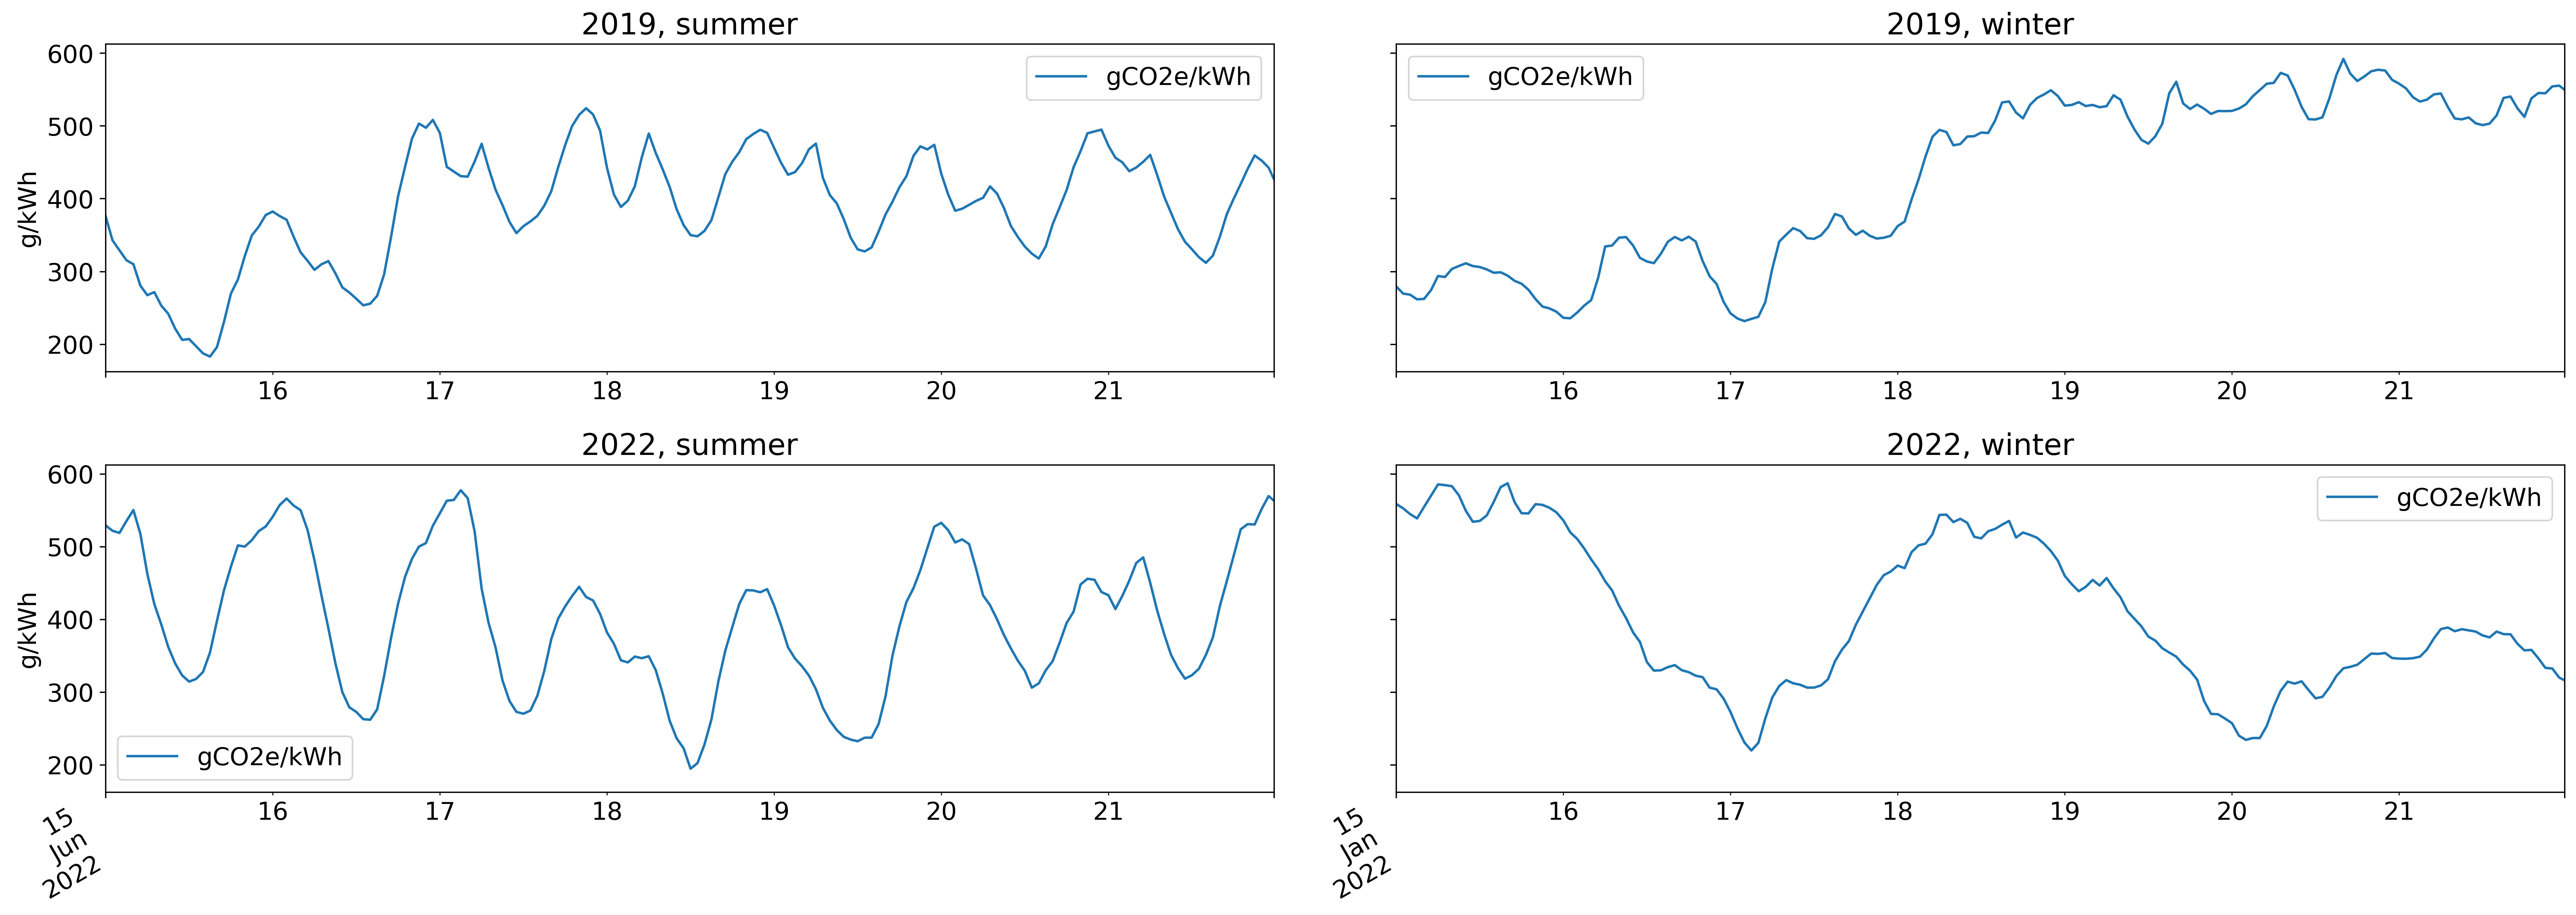

In [9]:
# define ranges
s_start_date, s_end_date = '-06-15', '-06-22'
w_start_date, w_end_date = '-01-15', '-01-22'
years = ['2019', '2022']
months = ['06', '01']
# set up plot
fig, ax = plt.subplots(figsize = (22,8), nrows=2, ncols=2, sharey=True)
# plot
for i in range(len(years)):
    df = out_dict[int(years[i])]
    for j in range(len(months)):
        start, end = f'{years[i]}-{months[j]}-15', f'{years[i]}-{months[j]}-22'
        df_j = df.loc[(df.index >= start) & (df.index < end)]
        season = 'summer' if int(months[j]) == 6 else 'winter'
        df_j.plot(ax=ax[i][j], title = f'{years[i]}, {season}', xlabel='', ylabel='g/kWh')
fig.autofmt_xdate()
plt.tight_layout()
plt.gcf().set_dpi(300)

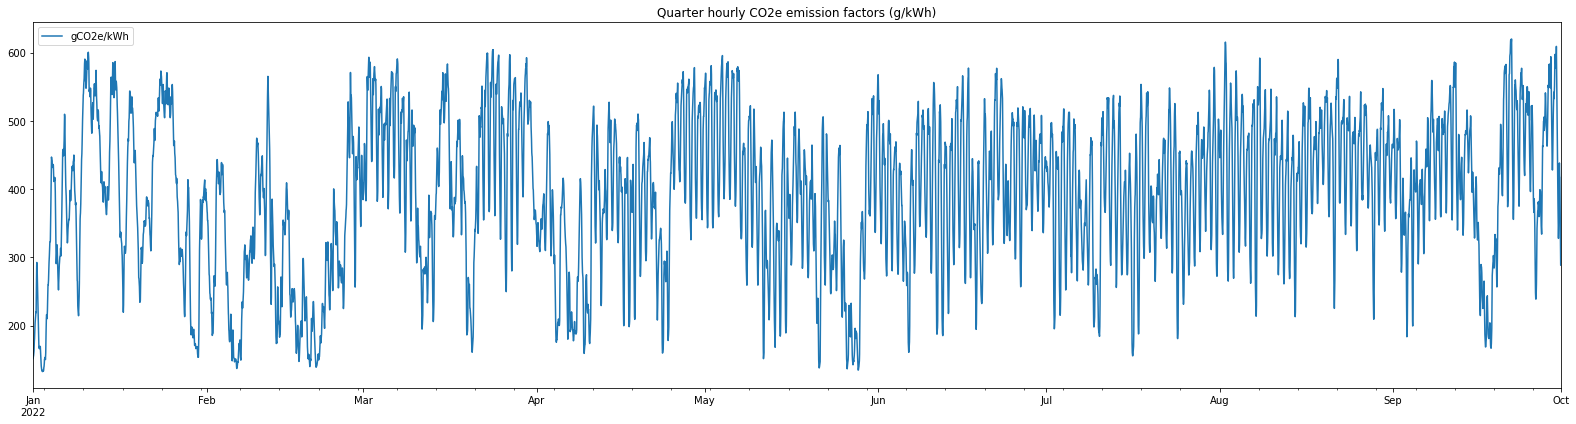

In [26]:
fig, ax = plt.subplots(figsize = (22,6))
co2e_2022[co2e_2022.index <= '2022-10-01'].plot(ax=ax, title = 'Quarter hourly CO2e emission factors (g/kWh)')
ax.set_xlabel('')
plt.tight_layout()
plt.show()

#### Export to .xlsx

In [52]:
df19 = out_dict[2019]
df22 = out_dict[2022]
df19.to_excel(home_path + '/2019_qh_gCO2e_kWh.xlsx')
df22.to_excel(home_path + '/2022_qh_gCO2e_kWh.xlsx')